## Visualize the graph of Tensor operations

In [1]:
# You must have installed graphviz program in your computer: https://graphviz.org/download/
# pip install graphviz
from graphviz import Digraph

import os
import sys
# Import .././ directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import synapgrad
import numpy as np
from synapgrad import nn

Simple Example

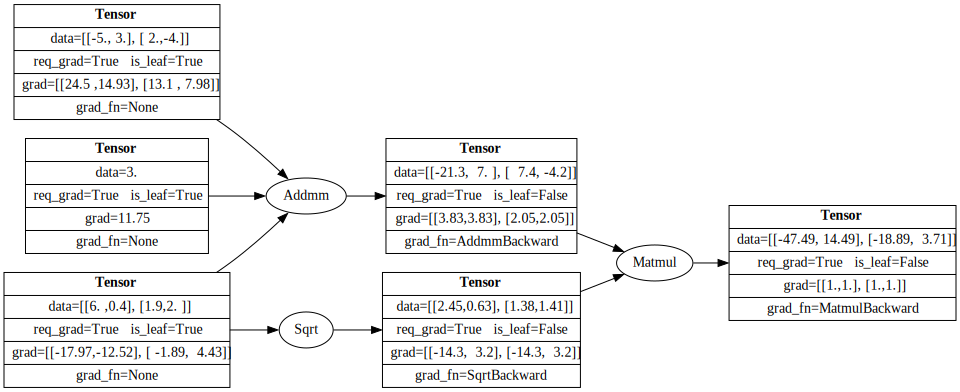

In [2]:
with synapgrad.retain_grads():
    x1 = synapgrad.tensor([[-5.0, 3.0], [2.0, -4.0]], requires_grad=True)
    x2 = synapgrad.tensor([[6.0, 0.4], [1.9,  2.0]], requires_grad=True)
    x3 = synapgrad.tensor(3.0, requires_grad=True)
    y = synapgrad.addmm(x3, x1, x2)
    z = x2.sqrt() @ y
    z.backward(synapgrad.ones(z.shape))
dot = z.draw_graph()
dot

Save graph

In [3]:
# dot.render(...)

Simple MLP

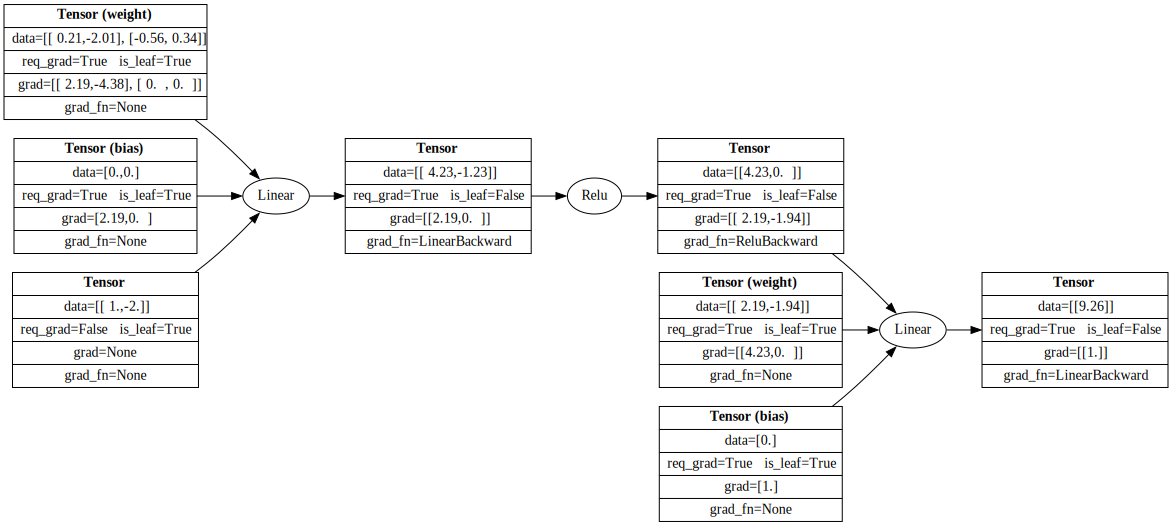

In [4]:
synapgrad.manual_seed(1337)

with synapgrad.retain_grads():
    x = synapgrad.tensor([[1.0, -2.0,]])
    relu = nn.ReLU()

    out = nn.Linear(2, 2)(x)
    out = relu(out)
    out = nn.Linear(2, 2)(x)
    out = relu(out)
    out = nn.Linear(2, 1)(out)
    
    out.sum().backward()

out.draw_graph()